<a href="https://colab.research.google.com/github/JamesKevinStar/ImplementacionesRedesNeuronales/blob/main/Red%20Neuronal%20SOM/Tarea_N%C2%B08_Implementaci%C3%B3n_Red_Neuronal_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de la Red Neuronal SOM
```
Docente     : Luis Beltran Palma Ttito
Alumnos     : James Kevin Estrella Vilca (182909) - Raísa Melina Peña Luque (182927)
Lugar       : Cusco, Perú, 2023
Universidad : Universidad Nacional de San Antonio Abad del Cusco
```

# 1. Importar Librerías

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import random
import pylab

from matplotlib import pylab

%matplotlib inline

# 2. Leer Datos

In [ ]:
data1 = pd.read_csv("ds_cluster11.csv", delimiter = ",")
data1.head()

,x,y
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [ ]:
data2 = pd.read_csv("ds_cluster55.csv", delimiter = ",")
data2.head()

,latitud,longitud,profundidad
0,-20.42,181.62,562
1,-20.62,181.03,650
2,-26.00,184.10,42
3,-17.97,181.66,626
4,-20.42,181.96,649


# 3. Normalizar

In [ ]:
def Normalización(datos):
    return (datos - datos.min())/(datos.max() - datos.min())

In [ ]:
data1.loc[:,["x","y"]] = Normalización(data1.loc[:,["x","y"]])
data1.head()

,x,y
0,0.222222,0.041667
1,0.166667,0.041667
2,0.111111,0.041667
3,0.083333,0.041667
4,0.194444,0.041667


In [ ]:
data2.loc[:,["latitud","longitud","profundidad"]] = Normalización(data2.loc[:,["latitud","longitud","profundidad"]])
data2.head()

,latitud,longitud,profundidad
0,0.651956,0.710151,0.815625
1,0.644779,0.683882,0.953125
2,0.451740,0.820570,0.003125
3,0.739864,0.711932,0.915625
4,0.651956,0.725289,0.951562


# 4. DataFrame a Numpy

In [ ]:
def Df_Np(Data):
    X = Data.values
    return X

In [ ]:
X1 = Df_Np(data1)
print(X1)

[[0.22222222 0.04166667]
 [0.16666667 0.04166667]
 [0.11111111 0.04166667]
 [0.08333333 0.04166667]
 [0.19444444 0.04166667]
 [0.30555556 0.125     ]
 [0.08333333 0.08333333]
 [0.19444444 0.04166667]
 [0.02777778 0.04166667]
 [0.16666667 0.        ]
 [0.30555556 0.04166667]
 [0.13888889 0.04166667]
 [0.13888889 0.        ]
 [0.         0.        ]
 [0.41666667 0.04166667]
 [0.38888889 0.125     ]
 [0.30555556 0.125     ]
 [0.22222222 0.08333333]
 [0.38888889 0.08333333]
 [0.22222222 0.08333333]
 [0.30555556 0.04166667]
 [0.22222222 0.125     ]
 [0.08333333 0.04166667]
 [0.22222222 0.16666667]
 [0.13888889 0.04166667]
 [0.19444444 0.04166667]
 [0.19444444 0.125     ]
 [0.25       0.04166667]
 [0.25       0.04166667]
 [0.11111111 0.04166667]
 [0.13888889 0.04166667]
 [0.30555556 0.125     ]
 [0.25       0.        ]
 [0.33333333 0.04166667]
 [0.16666667 0.04166667]
 [0.19444444 0.04166667]
 [0.33333333 0.04166667]
 [0.16666667 0.        ]
 [0.02777778 0.04166667]
 [0.22222222 0.04166667]


In [ ]:
X2 = Df_Np(data2)
print(X2)

[[0.65195551 0.71015138 0.815625  ]
 [0.64477933 0.68388246 0.953125  ]
 [0.45174022 0.8205699  0.003125  ]
 ...
 [0.66236096 0.82502226 0.31875   ]
 [0.76031575 0.98530721 0.        ]
 [0.60997488 0.21772039 0.1953125 ]]


# 5. Implementación de la Red Neuronal SOM

## A. Generar Pesos

In [ ]:
def Generar_Pesos(Dimensiones, X):
    W = np.random.rand(Dimensiones[0]*Dimensiones[1], X)
    return W

## B. Calcular Distancia Euclidiana

In [ ]:
def Distancia_Euclidiana(X, W):
    D = []
    for j in range(len(W)):
        S = 0
        for i in range(len(X)):
            S = S + (W[j][i] - X[i])**2
        D.append(S**(1/2))
    return D

## C. Cálculo de RO

In [ ]:
def Calcular_RO(RI, RF, IA, IT):
    return RI + (RF-RI)*(IA/IT)

## D. Cálculo Alfa

In [ ]:
def Calcular_ALFA(AI, AF, IA, IT):
    return AI*(AF/AI)**(IA/IT)

## E. Determinar qué neuronas se modifican

In [ ]:
def Vecindad(WD, RO):
    R = []
    for i in range(len(WD)):
        if WD[i] <= RO:
            R.append(1)
        else:
            R.append(0)
    return R

## F. Actualizar Pesos

In [ ]:
def Actualizar_Pesos(W, X, WD, Alfa):
    for i in range(len(W)):
        for j in range(len(W[i])):
            W[i][j] = W[i][j] + Alfa*WD[i]*(X[j] - W[i][j])
    return W

## G. Entrenar la Red SOM

In [ ]:
def Entrenar_Red_SOM(X, Iteraciones, AI, AF, RI, RF, Dimensiones):
    Alfas = []
    Ros = []
    W = Generar_Pesos(Dimensiones, len(X[0]))
    for i in range(Iteraciones):
        print("\nITERACIÓN ",i)
        Alfas.append(Calcular_ALFA(AI, AF, i + 1, Iteraciones))
        print(Alfas)
        Ros.append(Calcular_RO(RI, RF, i + 1, Iteraciones))
        print(Alfas)
        D = Distancia_Euclidiana(X[i%len(X)], W)
        print(D)
        Índice = D.index(min(D))
        print(Índice)
        WD = Distancia_Euclidiana(W[Índice], W)
        print(WD)
        WD = Vecindad(WD, Ros[i])
        print(WD)
        W = Actualizar_Pesos(W, X[i%len(X)], WD, Alfas[i])
        print(W)
    return W

## H. Mostrar el Mapa de Color

In [ ]:
def Mostrar(W, Dimensiones):
    L = len(W[0])
    M = []
    for i in range(len(W)):
        Aux = 0
        for j in range(L):
            Aux = Aux + W[i][j]**2
        M.append(Aux**(1/2))
    Matriz = np.reshape(M, (Dimensiones[0],Dimensiones[1]))
    print(Matriz)
    plt.imshow(Matriz)
    plt.colorbar()
    plt.show()

    M = np.array(M)
    V = np.sort(M)
    M = V.tolist()
    Matriz = np.reshape(M, (Dimensiones[0],Dimensiones[1]))
    plt.imshow(Matriz)
    plt.colorbar()
    plt.show()

# 6. Prueba DataSet Cluster11

## A. Prueba 1

In [ ]:
Dimensiones1 = [15,10]
W1_1 = Entrenar_Red_SOM(X1, 450, 0.4, 0.1, 0.3, 0.05, Dimensiones1)
print(W1_1)

[[0.18225998 0.16847079]
 [0.18225998 0.16847079]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.52233471 0.77637609]
 [0.75951578 0.87576785]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.18225998 0.16847079]
 [0.75951579 0.87576785]
 [0.18225998 0.16847079]
 [0.7595158  0.87576784]
 [0.18225998 0.16847079]
 [0.18225998 0.16847079]
 [0.41318514 0.5231156 ]
 [0.93071848 0.21547577]
 [0.18225998 0.16847079]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.18225998 0.16847079]
 [0.18225998 0.16847079]
 [0.18225998 0.16847079]
 [0.18225998 0.16847079]
 [0.95783077 0.15696762]
 [0.41318514 0.5231156 ]
 [0.75951579 0.87576784]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.75951579 0.87576783]
 [0.01624486 0.94494571]
 [0.41318514 0.5231156 ]
 [0.41318514 0.5231156 ]
 [0.18225998 0.16847079]


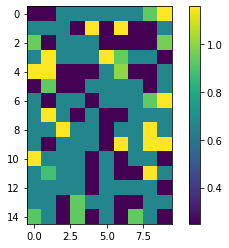

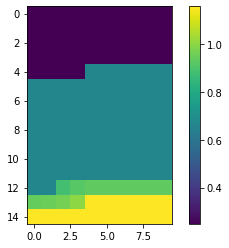

In [ ]:
Mostrar(W1_1, Dimensiones1)

## B. Prueba 2

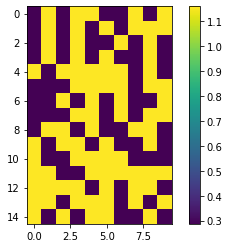

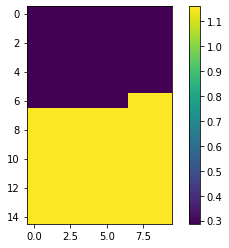

In [ ]:
W1_2 = Entrenar_Red_SOM(X1, 320, 0.6, 0.3, 0.4, 0.05, Dimensiones1)
Mostrar(W1_2, Dimensiones1)

# 7. Prueba DataSet Cluster55

## A. Prueba 1

In [ ]:
Dimensiones2 = [25,40]
W2_1 = Entrenar_Red_SOM(X2, 2000, 0.6, 0.25, 0.27, 0.05, Dimensiones2)
print(W2_1)

[[0.38620664 0.77814563 0.07776007]
 [0.68158315 0.82784818 0.3013033 ]
 [0.88898051 0.22617274 0.94726264]
 ...
 [0.38620664 0.77814563 0.07776007]
 [0.59980613 0.21715131 0.11749183]
 [0.8889805  0.22617272 0.94726262]]


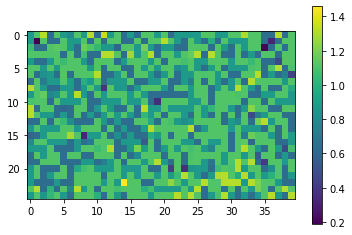

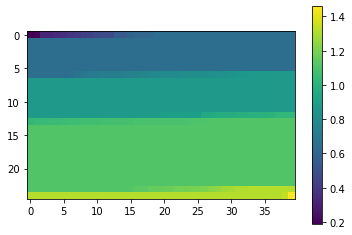

In [ ]:
Mostrar(W2_1, Dimensiones2)

## B. Prueba 2

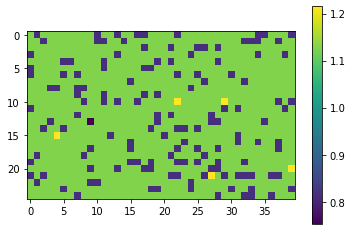

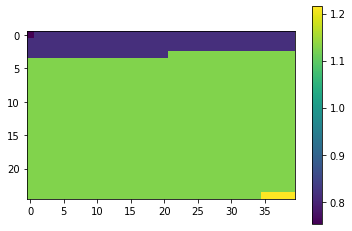

In [ ]:
W2_2 = Entrenar_Red_SOM(X2, 1500, 0.4, 0.14, 0.5, 0.1, Dimensiones2)
Mostrar(W2_2, Dimensiones2)